## Motif using logos in python using matplotlib

This is a proof of concept for plotting motif logos using matplotlib.
The coordinates for bases were picked of from [seqLogo](http://bioconductor.org/packages/release/bioc/html/seqLogo.html) package.

`seqLogo` is LGPL(v2.1) licensed and hence so is this notebook.

See [LICENCE](LICENSE)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

colors_scheme = {'G': 'orange', 'T': 'red', 'C': 'blue', 'A': 'green'}


In [2]:
def plotA(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot A"""
    x = np.array([ 0.  ,  0.4 ,  0.6 ,  1.  ,  0.8 ,  0.68,  0.32,  0.2 ,  0.])
    y = np.array([ 0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.3 ,  0.3 ,  0.  ,  0.])
    x = xstart + xscale*x
    y = ystart + yscale*y
    triy =  np.array([0.4 ,   0.4 , 0.75, 0.4])
    trix =  np.array([0.36,   0.64, 0.5, 0.36])

    trix = xstart + xscale*trix
    triy = ystart + yscale*triy
    
    return x, y, trix, triy

def plotT(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot T"""
    x = np.array([ 0. ,  1. ,  1. ,  0.6,  0.6,  0.4,  0.4,  0. ])
    y = np.array([ 1. ,  1. ,  0.9,  0.9,  0. ,  0. ,  0.9,  0.9])
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

def plotG(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot G"""
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 =0.5 + 0.5*np.cos(angle1)
    xl2 =0.5 + 0.5*np.sin(angle2)
    yl2 =0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    
    r1 = np.max(xl1)

    h1 = 0.4
    xadd = np.array([r1,0.5,0.5,r1-0.2,r1-0.2,r1,r1])
    yadd = np.array([h1,h1,h1-0.1,h1-0.1,0,0,h1])
    
    x = np.concatenate((x[::-1],xadd))
    y = np.concatenate((y[::-1],yadd))

    x = xstart + xscale*x
    y = ystart + yscale*y
    
    return x,y

def plotC(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot C"""
    
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 = 0.5 + 0.5*np.cos(angle1)
    xl2 = 0.5 + 0.5*np.sin(angle2)
    yl2 = 0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

<IPython.core.display.Javascript object>


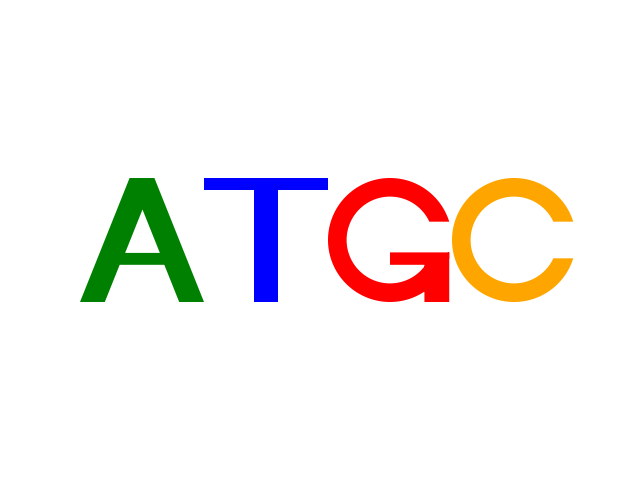

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
patches = []

In [4]:
X, Y, triX, triY = plotA() 
A_plot = mpatches.Polygon(zip(X,Y), closed=True, fill=None)
patches.append(A_plot)

X, Y = plotT(xstart=1) 
T_plot = mpatches.Polygon(zip(X,Y), closed=True)
patches.append(T_plot)

X, Y = plotG(xstart=2) 
G_plot = mpatches.Polygon(zip(X,Y), closed=True)
patches.append(G_plot)

X, Y = plotC(xstart=3) 
C_plot = mpatches.Polygon(zip(X,Y), closed=True)
patches.append(C_plot)

In [5]:
collection = PatchCollection(patches, edgecolors='none', facecolors=colors_scheme.values())
ax.add_collection(collection)
ax.fill_between(triX, triY, color="white",edgecolor="b", linewidth=0.0)    
plt.axis('equal')
plt.axis('off')
plt.show()